# Mixed PCA (MPCA) wine ggplot2

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools import load_carsacpm
cars = load_carsacpm()

In [3]:
import pandas as pd
cars2 = cars.copy()
cars2.columns = [x+"2" for x in cars2.columns]
cars3 = cars.copy()
cars3.index = [x+"2" for x in cars3.index]
Cars = pd.concat((pd.concat((cars,cars3),axis=0),cars2),axis=1)
Cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, AS2 to VW32
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CONS    54 non-null     float64
 1   CYLI    54 non-null     int64  
 2   VITE    54 non-null     int64  
 3   VOLU    54 non-null     int64  
 4   RP/P    54 non-null     float64
 5   LONG    54 non-null     float64
 6   FISC    54 non-null     object 
 7   MARQ    54 non-null     object 
 8   PRIX    54 non-null     object 
 9   CONS2   27 non-null     float64
 10  CYLI2   27 non-null     float64
 11  VITE2   27 non-null     float64
 12  VOLU2   27 non-null     float64
 13  RP/P2   27 non-null     float64
 14  LONG2   27 non-null     float64
 15  FISC2   27 non-null     object 
 16  MARQ2   27 non-null     object 
 17  PRIX2   27 non-null     object 
dtypes: float64(9), int64(3), object(6)
memory usage: 10.1+ KB


In [4]:
from scientisttools import MPCA
res_mpca = MPCA(n_components= 5,quanti_sup=list(range(9,15)),quali_sup=[15,16,17],ind_sup=list(range(cars.shape[0],Cars.shape[0])))
res_mpca.fit(Cars)

MPCA(ind_sup=[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
              43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
     quali_sup=[15, 16, 17], quanti_sup=[9, 10, 11, 12, 13, 14])

## Eigenvalues

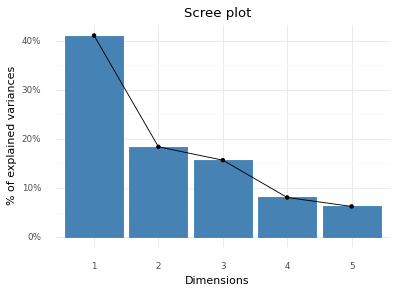

In [5]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mpca)
print(p)

## Individuals Factor Map

### Color by RGB colors

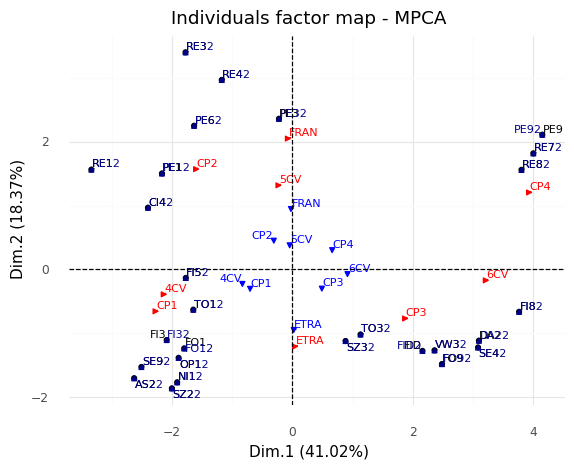

In [6]:
from scientisttools import fviz_mpca_ind
p = fviz_mpca_ind(res_mpca,repel=True)
print(p)

### Color by Cos2

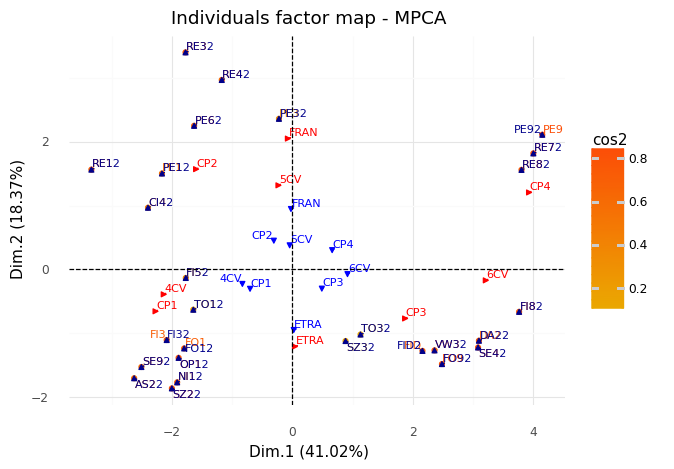

In [7]:
p = fviz_mpca_ind(res_mpca,color="cos2",repel=True)
print(p)

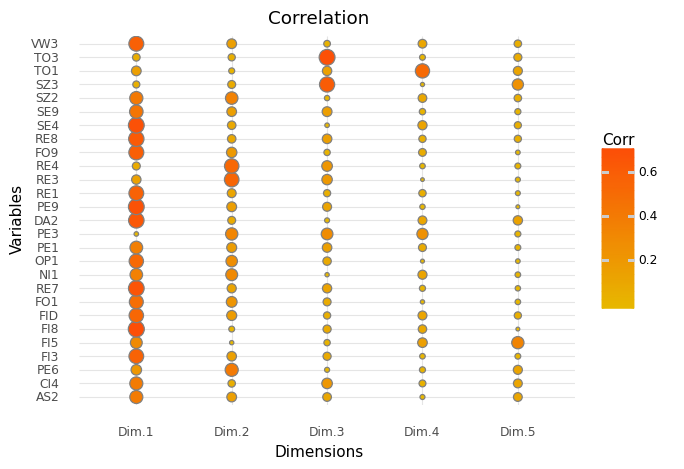

In [8]:
from scientisttools import fviz_corrplot
p = fviz_corrplot(res_mpca.ind_["cos2"],colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

### Color by contrib

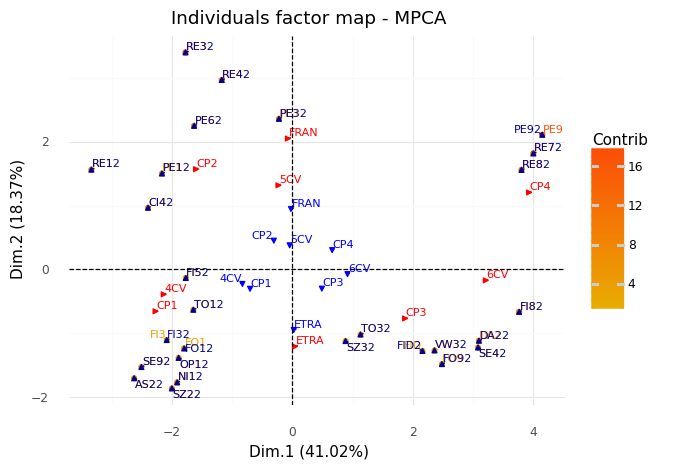

In [9]:
p = fviz_mpca_ind(res_mpca,color="contrib",repel=True)
print(p)

### Color by quantitatives columns

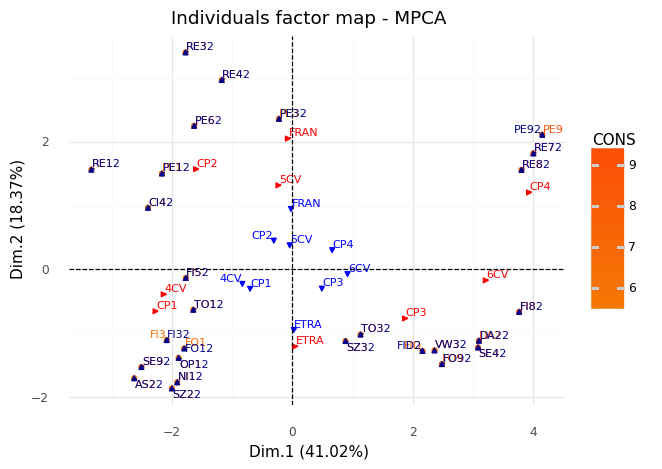

In [10]:
p = fviz_mpca_ind(res_mpca,color="CONS",repel=True)
print(p)

### Color by actives qualitatives columns

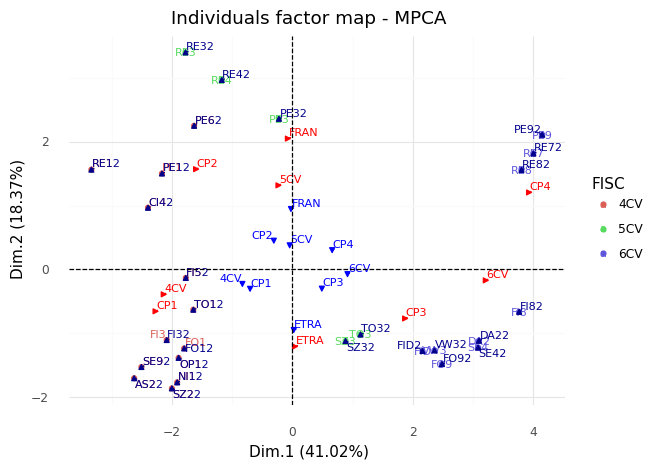

In [11]:
p = fviz_mpca_ind(res_mpca,habillage="FISC",repel=True)
print(p)

### Color by supplementary qualitatives columns

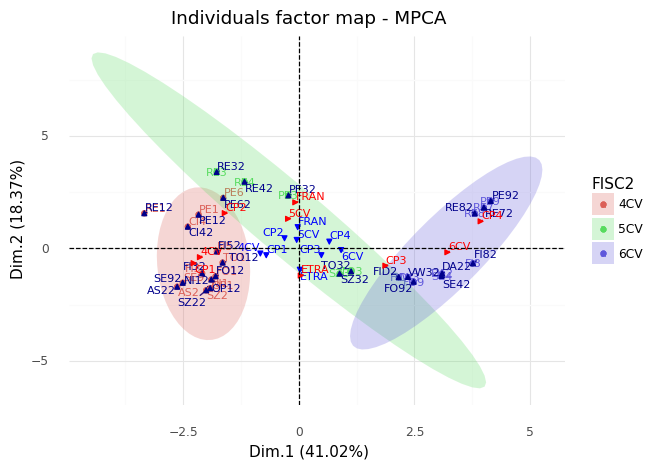

In [12]:
p = fviz_mpca_ind(res_mpca,habillage="FISC2",repel=True,add_ellipses=True)
print(p)

### Color by numpy array

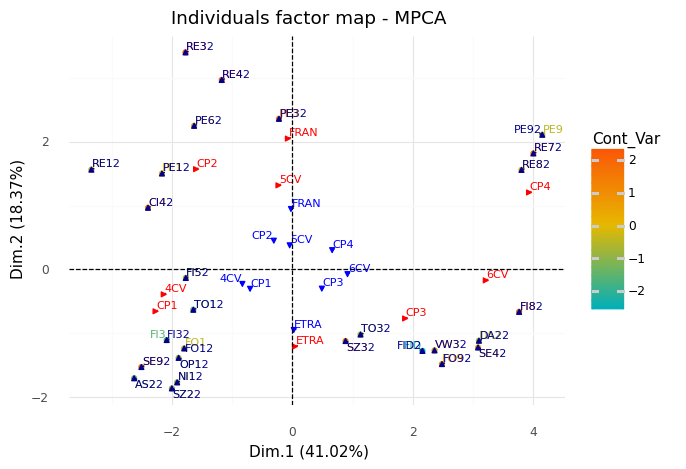

In [13]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_mpca.call_["X"].shape[0])
p = fviz_mpca_ind(res_mpca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

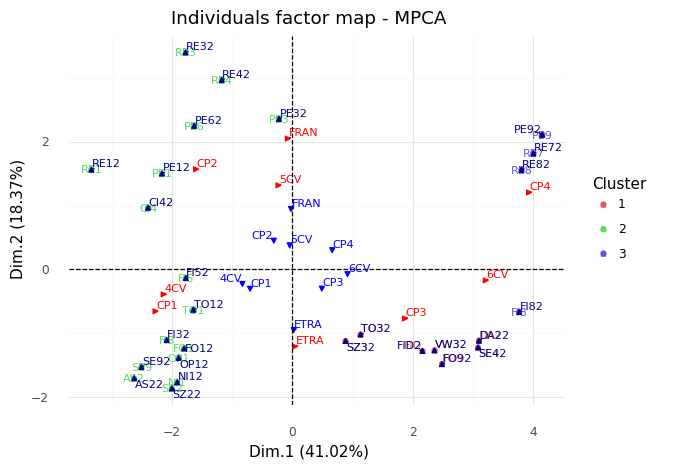

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mpca.ind_["coord"])
p = fviz_mpca_ind(res_mpca,color=kmeans,repel=True)
print(p)

### Set limits

#### Limit cos2

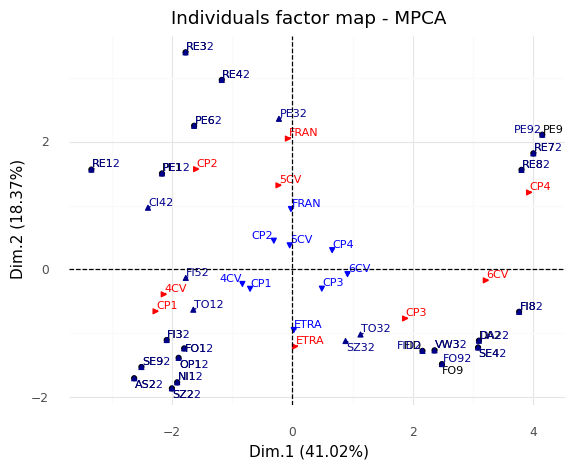

In [15]:
p = fviz_mpca_ind(res_mpca,lim_cos2=0.50,repel=True)
print(p)

#### limit contrib

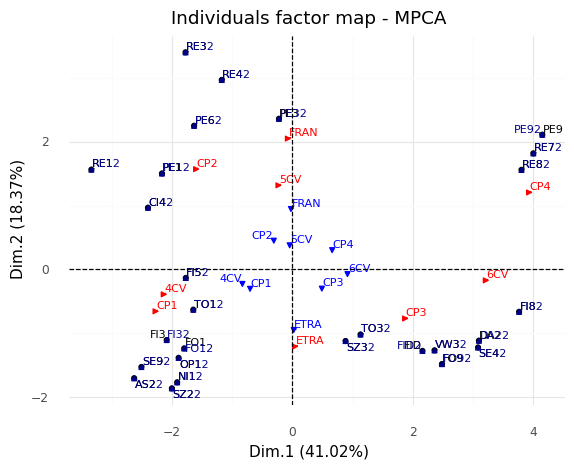

In [16]:
p = fviz_mpca_ind(res_mpca,lim_contrib=20,repel=True)
print(p)

## Quantitatives variables informations

### Color by RGB colors

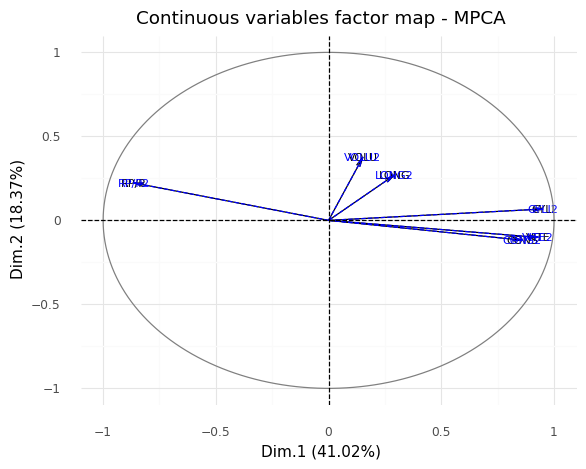

In [17]:
from scientisttools import fviz_mpca_col
p = fviz_mpca_col(res_mpca)
print(p)

### Color by cos2

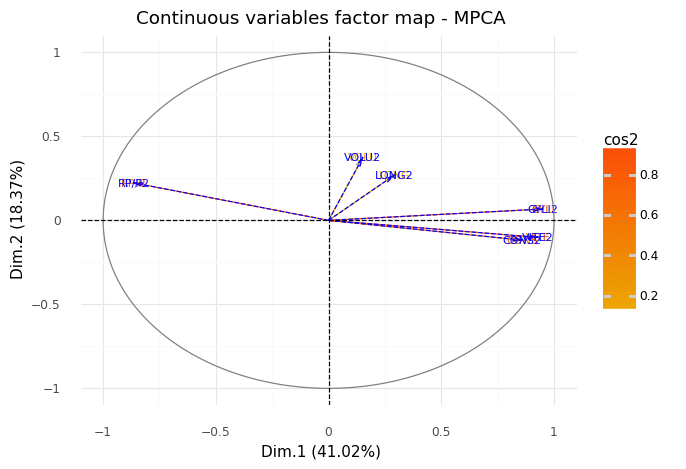

In [18]:
p = fviz_mpca_col(res_mpca,color="cos2")
print(p)

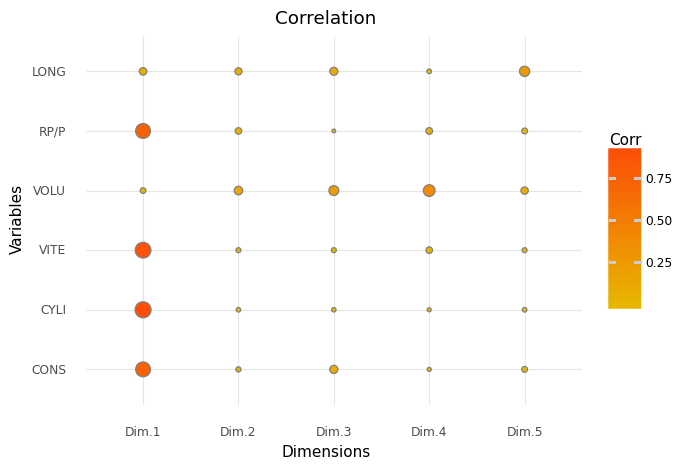

In [19]:
p = fviz_corrplot(res_mpca.quanti_var_["cos2"],colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

## Color by contrib

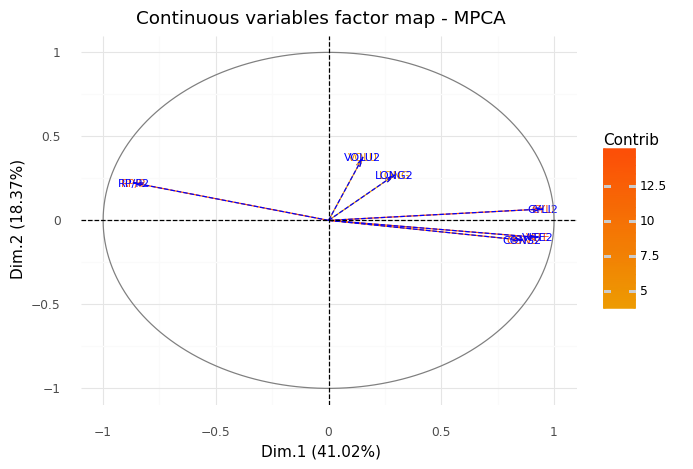

In [20]:
p = fviz_mpca_col(res_mpca,color="contrib")
print(p)

### Coloor by numpy array

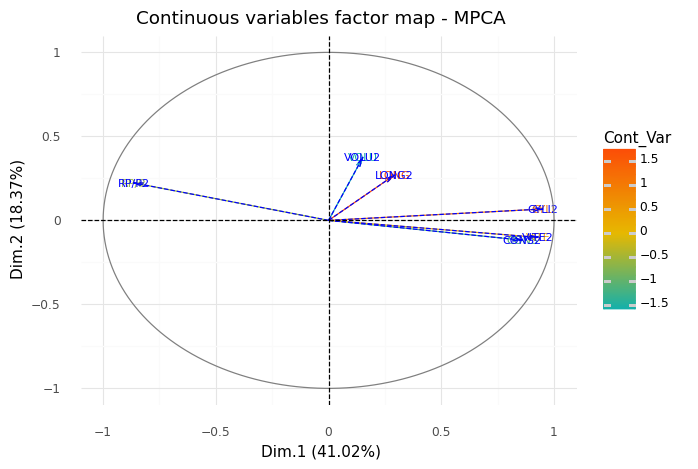

In [21]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mpca.quanti_var_["coord"].shape[0])
p = fviz_mpca_col(res_mpca,color=color_numpy)
print(p)

### Color by kmeans clustering

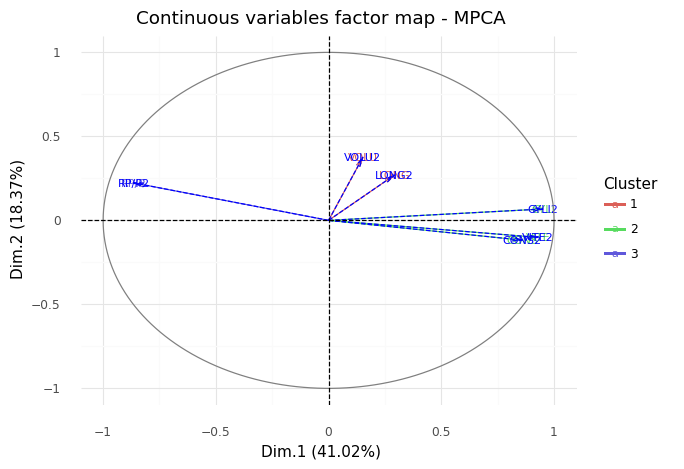

In [22]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mpca.quanti_var_["coord"])
p = fviz_mpca_col(res_mpca,color=kmeans)
print(p)

## Set limit

### limit cos2

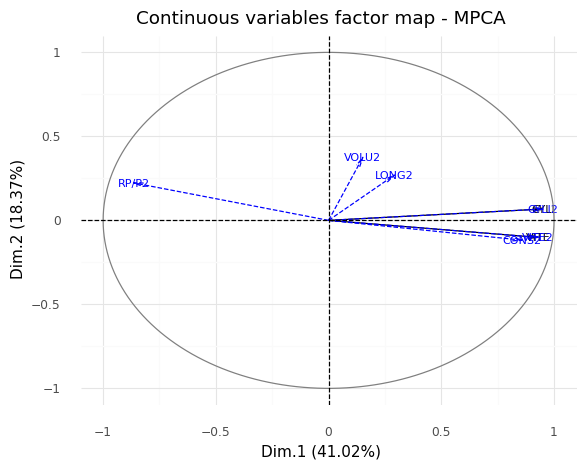

In [23]:
p = fviz_mpca_col(res_mpca,lim_cos2=0.8)
print(p)

### limit contrib

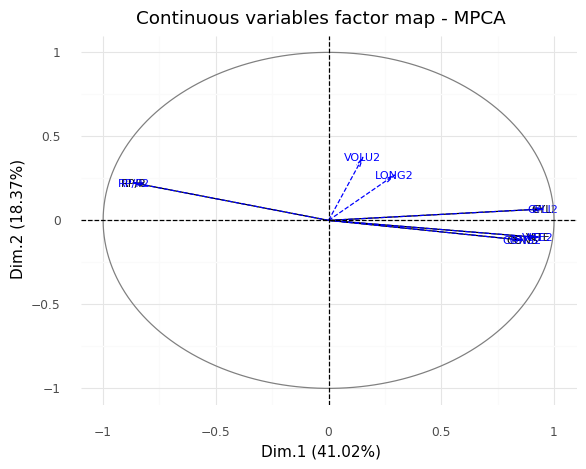

In [24]:
p = fviz_mpca_col(res_mpca,lim_contrib=8)
print(p)

## Qualitatives variables - Categories

### Color by RGB colors

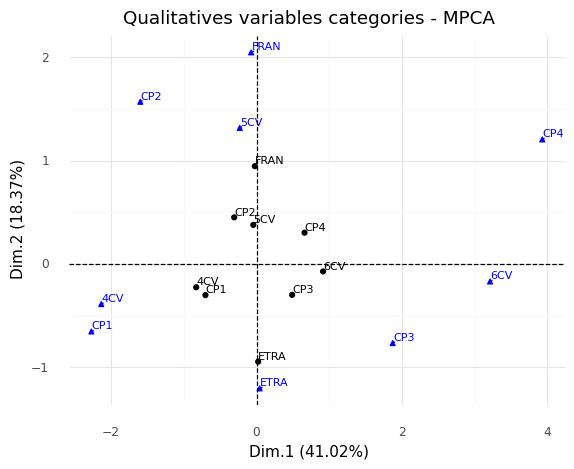

In [25]:
from scientisttools import fviz_mpca_mod
p = fviz_mpca_mod(res_mpca,repel=True)
print(p)

### Color by cos2

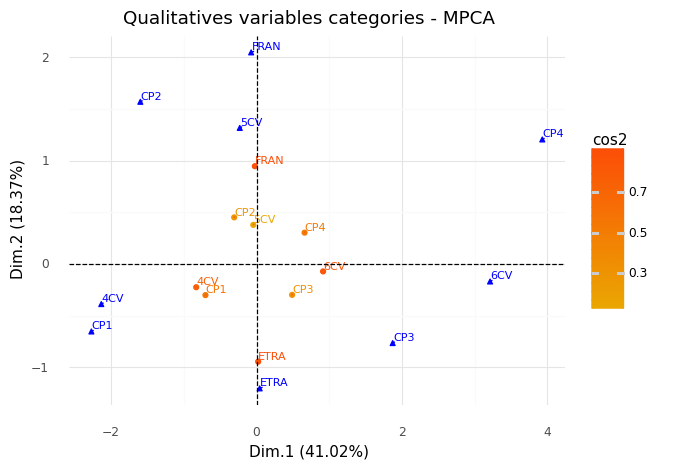

In [26]:
p = fviz_mpca_mod(res_mpca,color="cos2",repel=True)
print(p)

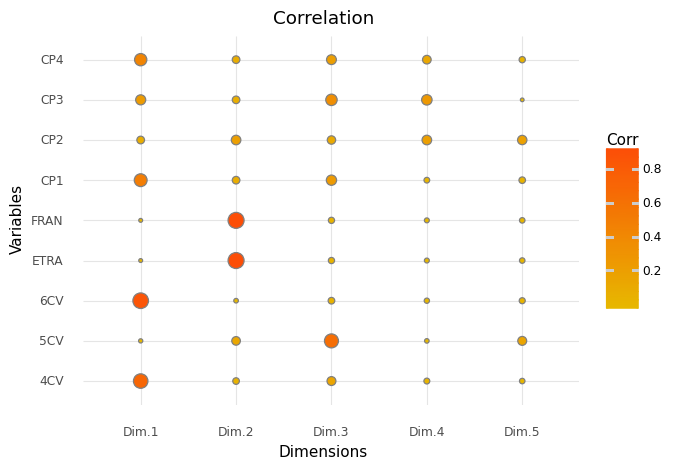

In [27]:
p = fviz_corrplot(res_mpca.quali_var_["cos2"],colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

### Color by contrib

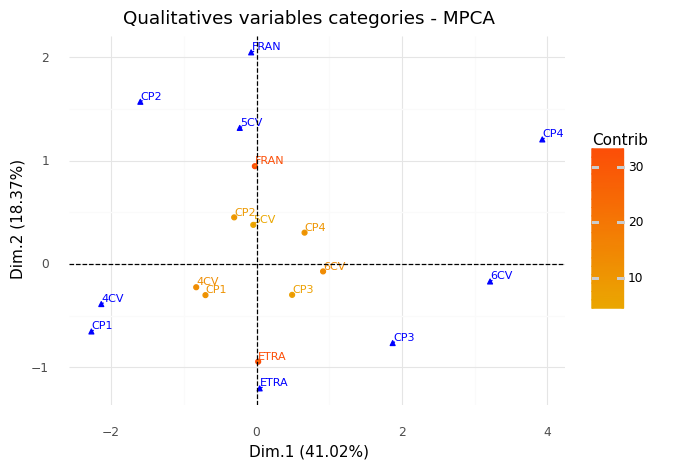

In [28]:
p = fviz_mpca_mod(res_mpca,color="contrib",repel=True)
print(p)

### Color by numpy array

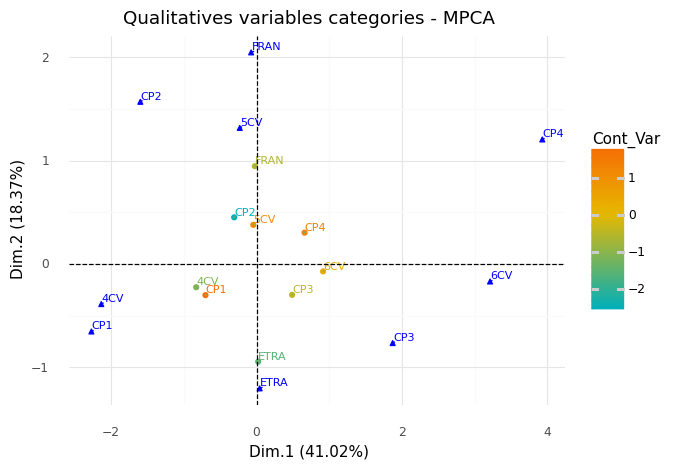

In [29]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mpca.quali_var_["coord"].shape[0])
p = fviz_mpca_mod(res_mpca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

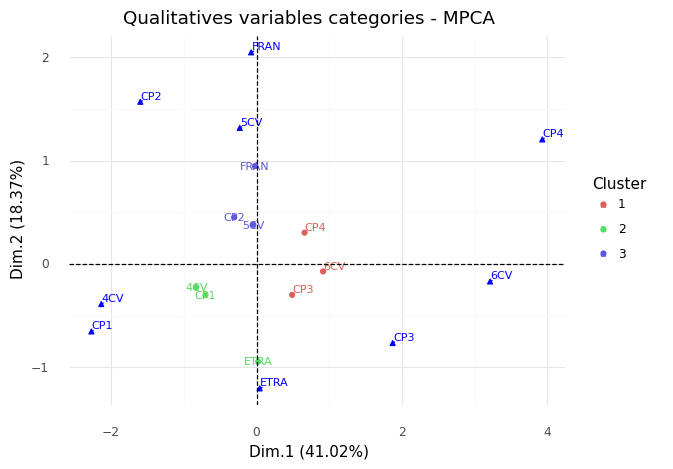

In [30]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mpca.quali_var_["coord"])
p = fviz_mpca_mod(res_mpca,color=kmeans,repel=True)
print(p)

## Set limit

### limit cos2

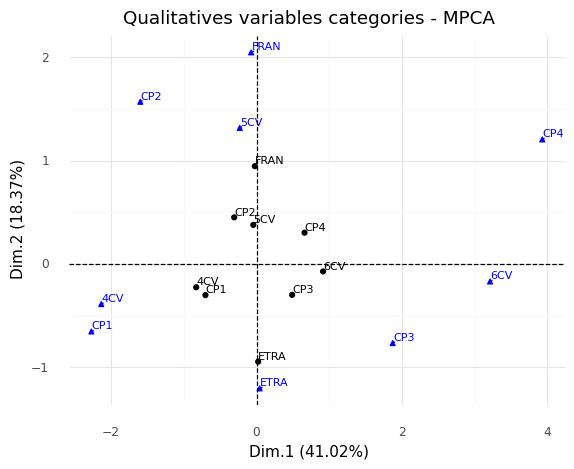

In [31]:
p = fviz_mpca_mod(res_mpca,lim_cos2=0.1,repel=True) # à corriger
print(p)

### limit contrib

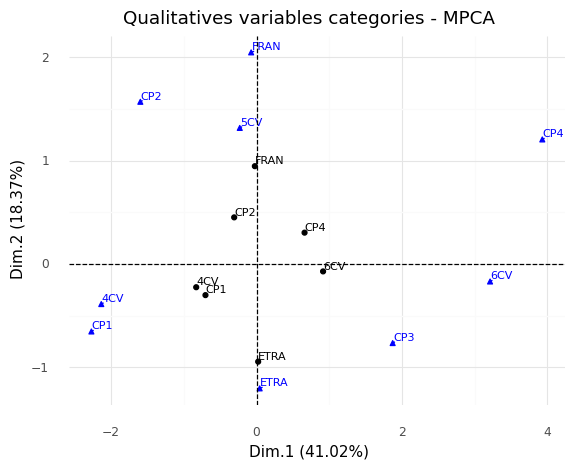

In [32]:
p = fviz_mpca_mod(res_mpca,lim_contrib=8,repel=True)
print(p)

## Variables

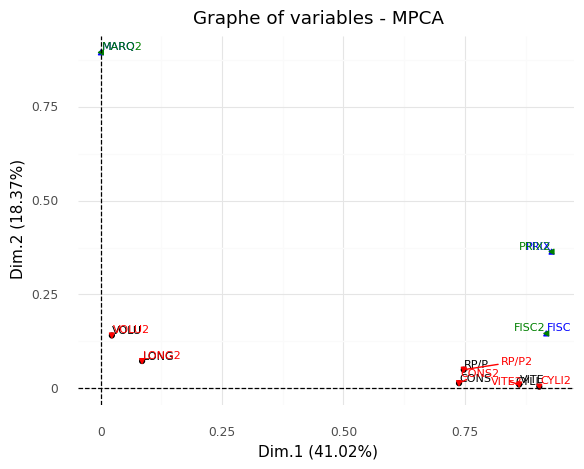

In [33]:
from scientisttools import fviz_mpca_var
p = fviz_mpca_var(res_mpca,repel=True)
print(p)

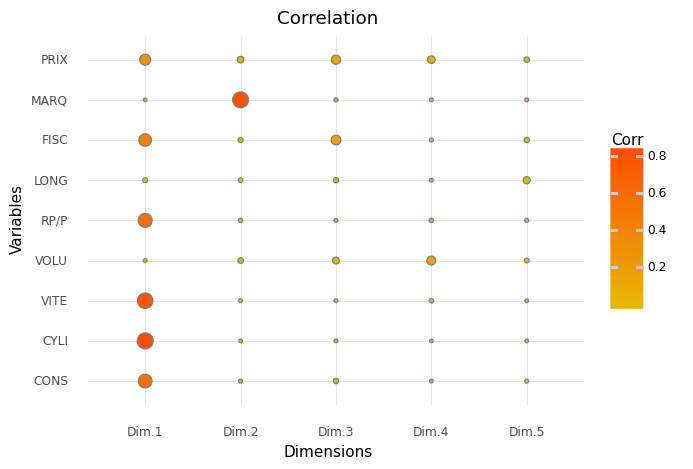

In [34]:
p = fviz_corrplot(res_mpca.var_["cos2"],colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

## Plot contributions

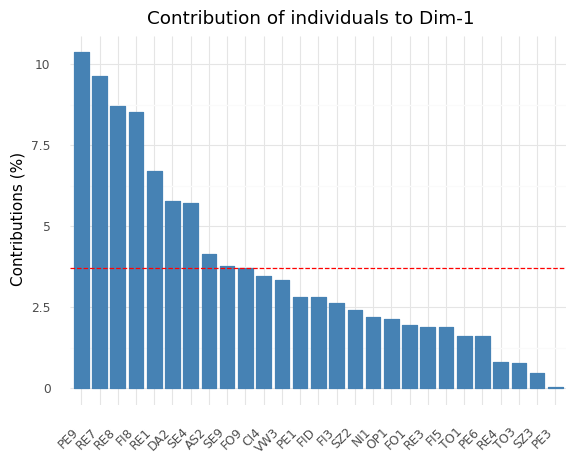

In [35]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_mpca,choice="ind")
print(p)

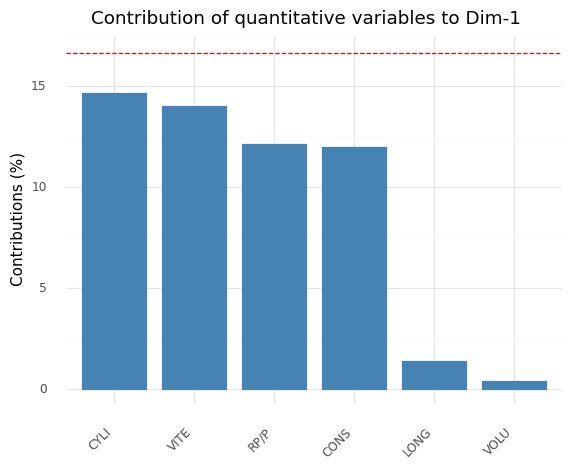

In [36]:
p = fviz_contrib(res_mpca,choice="quanti_var")
print(p)

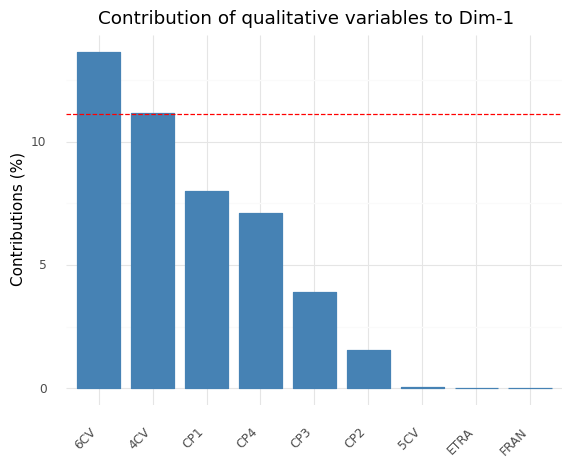

In [37]:
p = fviz_contrib(res_mpca,choice="quali_var")
print(p)

## Plot cos2

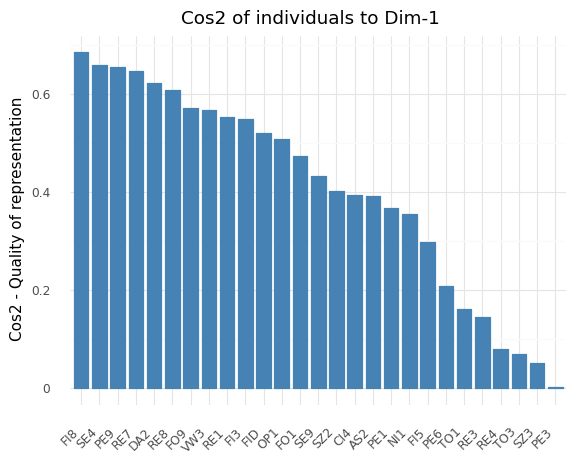

In [38]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_mpca)
print(p)

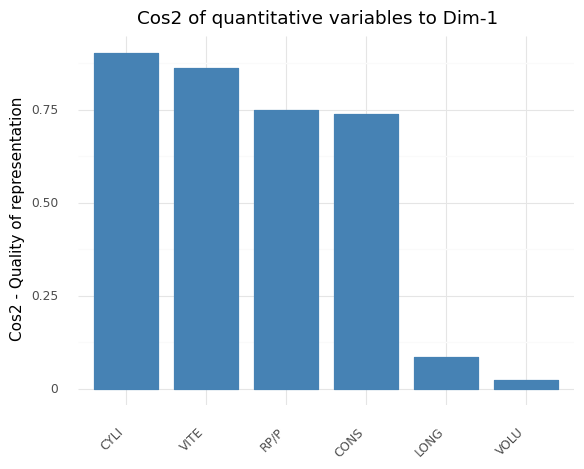

In [39]:
p = fviz_cos2(res_mpca,choice="quanti_var")
print(p)

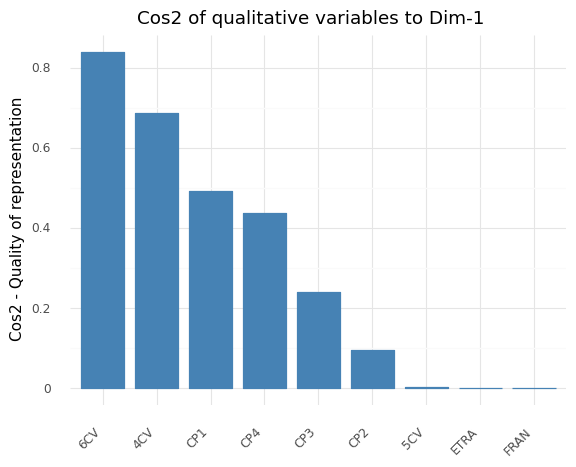

In [40]:
p = fviz_cos2(res_mpca,choice="quali_var")
print(p)

## Corrcircle

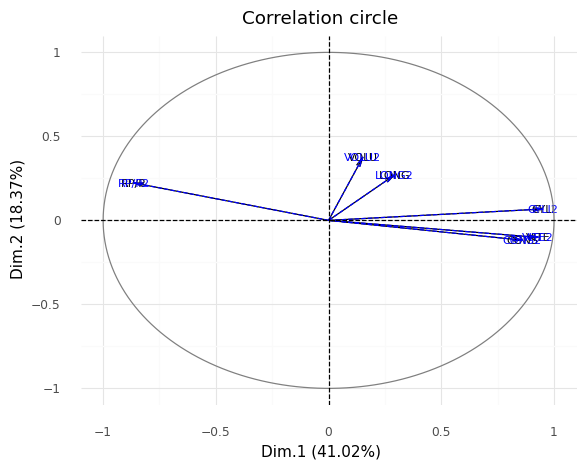

In [41]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_mpca)
print(p)